In [1]:
%matplotlib inline

<style>
.reveal h1, .reveal h2, .reveal h3{
    font-family: serif;
    color: #a671f0;
}
.reveal p{
    font-size: 20px;
}
.reveal li{
    font-size: 18px;
}
#cit{
    font-style: italic;
}
.reveal .slide-number {
    font-size: 28px !important;      /* Ingrandisci */
    color: #F57AB3 !important; 
    background: none !important;
    padding: 0 !important;
    margin: 0;
    border: none !important;
    border-radius: 0 !important;
    box-shadow: none !important;
    position: absolute;
    bottom: 10px;
    right: 4%;
    transform: translateX(50%);
    z-index: 1;
    font-weight: bold;
    font-family: sans-serif;
    opacity: 1;
    transition: color 0.3s ease;
}
.reveal aside.controls {
    bottom: 40px !important;
}
.reveal .controls .navigate-left,
.reveal .controls .navigate-right,
.reveal .controls .navigate-up,
.reveal .controls .navigate-down {
    color: #F57AB3 !important; 
    opacity: 1 !important;
    transition: color 0.3s ease;
}

.reveal .slide-number a {
  color: inherit !important;
  text-decoration: none !important;
}

.reveal .slide-number:hover,
.reveal .slide-number:hover a {
  color: #F57F7A !important;
}

.reveal .navigate-left:hover,
.reveal .navigate-right:hover,
.reveal .navigate-up:hover,
.reveal .navigate-down:hover {
  color: #F57F7A !important;
}

/* Color only the bullets/numbers */
.reveal ul li::marker {
  color: #A17AF5;  /* coral color */
}

.reveal ol li::marker {
  color: #A17AF5;  /* coral color */
}

/* fallback for browsers without ::marker */
.reveal ul li {
  list-style-position: inside;
  color: inherit;  /* keep text color unchanged */
}

.reveal ol li {
  list-style-position: inside;
  color: inherit;
}
</style>
<link rel="stylesheet" type="text/css" href="styles.css">
<h1>Cellulare e i suoi effetti</h1>
<p id="cit">"L'uomo s'è messo a fabbricar di ferro, d'acciaio le sue nuove divinità ed è diventato servo e schiavo di esse. Viva la Macchina che meccanizza la vita!"</p>
<h3>Motivazione</h3>
<p>La scelta è stata condizionata dalla curiosità di comprendere:
    <ul>
        <li>Le abitudini digitali delle persone</li>
        <li>L'impatto sulla salute fisica e mentale.</li>
    </ul>
</p>

<h2>Dataset</h2>
<p>Ho selezionato diversi dataset da Kaggle oltre ad uno realizzato da me <br> Questi trattano:</p>
<ol>
    <li>Cellulare con impatto su adolescienti,</li>
    <li>Comportamenti degli utenti,</li>
    <li>Cellulare con impatto sulla salute mentale</li>
</ol>

<h1>Le domande che mi sono posta:</h1>
<p>
    <ol>
        <li>Quale fascia d'età passa più tempo d'avanti agli schermi?</li>
        <li>Qual è l'impatto delle notifiche su di noi?</li>
        <li>Quali sono le app più usate dagli utenti? e per quanto tempo vengono usate?</li>
        <li>C'è correlazione tra l'uso dei social e i livelli di ansia? e con l'autostima?</li>
        <li>Il telefono prima di dormire influisce sul sonno?</li>
    </ol>
</p>

<h2>Tempo allo schermo</h2>
<p>
    Come per ipotesi, la fascia d'età che passa più ore allo schermo è quella di chi ha meno di 15 anni.
</p>

In [2]:
import pandas as pd

# Caricamento dataset
ds_pers = pd.read_csv('Dataset.csv', encoding='utf8')
ds_user_b = pd.read_csv('user_behavior_dataset.csv', encoding='utf8')
ds_mental_h = pd.read_csv('digital_diet_mental_health.csv', encoding='utf8')
ds_teen = pd.read_csv('teen_phone_addiction_dataset.csv', encoding='utf8')
ds_mobile = pd.read_csv('mobile_usage_behavioral_analysis.csv', encoding='utf8')

# Selezione colonne e rinomina per uniformare
un1 = ds_pers[['anni','use']].rename(columns={'anni': 'Age'})
un2 = ds_user_b[['Age', 'Screen On Time (hours/day)']].rename(columns={'Screen On Time (hours/day)': 'use'})
un3 = ds_mental_h[['age', 'daily_screen_time_hours']].rename(columns={'age': 'Age','daily_screen_time_hours': 'use'})
un4 = ds_mobile[['Age', 'Daily_Screen_Time_Hours']].rename(columns={'Daily_Screen_Time_Hours': 'use'})

# Concatenazione datie
df_concat = pd.concat([un1, un2, un3, un4], ignore_index=True)

# Funzione per mappare l'età in range personalizzati mantenendo quelli già corretti
def map_to_custom_range(age):
    if isinstance(age, str):
        age = age.strip()
        valid_ranges = ['<15','15-19', '20-34', '35-50', '50+']
        if age in valid_ranges:
            return age  # già un range corretto, mantieni
        if age.startswith('<'):
            return '<15'
        try:
            age = int(age)
        except:
            return age  # non riconosciuto, lascia così

    if isinstance(age, (int, float)):
        if age < 15:
            return '<15'
        elif 15 <= age <= 19:
            return '15-19'
        elif 20 <= age <= 34:
            return '20-34'
        elif 35 <= age <= 50:
            return '35-50'
        elif age > 50:
            return '50+'

    return age  # fallback

# Applicazione della funzione
df_concat['age_range'] = df_concat['Age'].apply(map_to_custom_range)

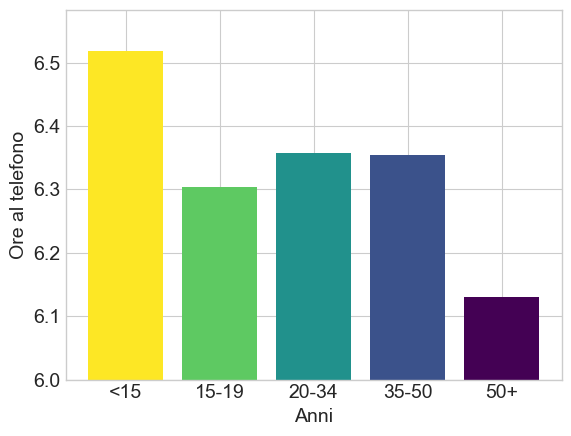

In [3]:
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('seaborn-v0_8-whitegrid')

# Conversione della colonna 'use' in numerica, forzando NaN per valori non convertibili
df_concat['use'] = pd.to_numeric(df_concat['use'], errors='coerce')

# Calcolo la media delle ore per ogni fascia d'età (ignora i NaN)
media_use = df_concat.groupby('age_range')['use'].mean()
ordered_ranges = ['<15', '15-19', '20-34', '35-50', '50+']
media_use = media_use.reindex([x for x in ordered_ranges if x in media_use.index])

# Creo il barplot
colors = plt.cm.viridis(np.linspace(1, 0, len(media_use)))  # o 'plasma', 'cool', ecc.
plt.bar(media_use.index, media_use.values, color=colors)

# Etichette
plt.xlabel('Anni' , fontsize=14)
plt.ylabel('Ore al telefono' , fontsize=14)
plt.xticks(fontsize=14)  # Ingrandisce i valori dell'asse x
plt.yticks(fontsize=14)  # Ingrandisce i valori dell'asse y
plt.ylim(6, max(media_use.values) * 1.01)
plt.show()

<h2>L'impatto delle notifiche</h2>
<p>
    <strong>Percezione delle notifiche come incentivo all'uso</strong><br><br>
    Quasi il 70% delle persone percepiscono le notifiche come distrazione, mentre i restanti sono divisi tra chi non fa uso di notifiche e chi in generale non ne vede il problema.
</p>

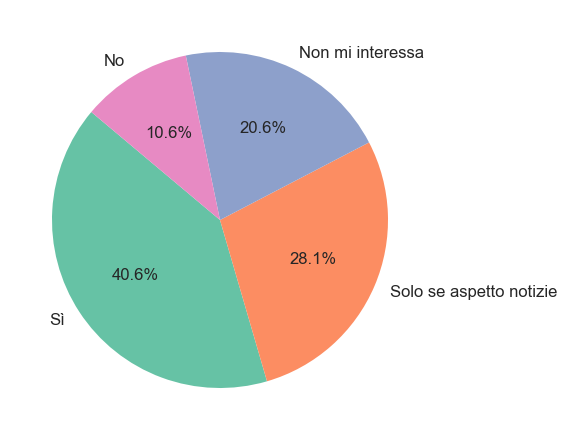

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Prepara il dataset (supponendo che ds_pers sia già caricato)
df2_stimolo = ds_pers[['time_app', 'notifiche', 'notifiche_problema', 'sblocchi']].copy()
df2_stimolo = df2_stimolo.rename(columns={
    'time_app': 'Usage_Time',
    'notifiche': 'Notifications',
    'notifiche_problema': 'Notification_Perception',
    'sblocchi': 'Unlocks'
})

# 2. Converti in numerico le colonne numeriche (utile se ci sono valori non numerici o NaN)
df2_stimolo['Notifications'] = pd.to_numeric(df2_stimolo['Notifications'], errors='coerce')
df2_stimolo['Usage_Time'] = pd.to_numeric(df2_stimolo['Usage_Time'], errors='coerce')
df2_stimolo['Unlocks'] = pd.to_numeric(df2_stimolo['Unlocks'], errors='coerce')

# 3. Rimuovi righe con valori NaN in queste colonne
df2_stimolo = df2_stimolo.dropna(subset=['Notifications', 'Usage_Time', 'Unlocks'])

# 4. Funzione per filtrare outlier basata sui percentili
def filter_outliers(df, column, lower_percentile=0.05, upper_percentile=0.95):
    low = df[column].quantile(lower_percentile)
    high = df[column].quantile(upper_percentile)
    return df[(df[column] >= low) & (df[column] <= high)]

# 5. Applica filtro agli outlier su tutte le colonne numeriche chiave
df_filtered = filter_outliers(df2_stimolo, 'Notifications')
df_filtered = filter_outliers(df_filtered, 'Usage_Time')
df_filtered = filter_outliers(df_filtered, 'Unlocks')

# Mappatura etichette più leggibili
perception_labels = {
    'Si': 'Sì',
    'No': 'No',
    'Si, ma solo quando aspetto notizie importanti': 'Solo se aspetto notizie',
    'Non mi interessa, di solito ho il telefono in silenzioso': 'Non mi interessa'
}

df_filtered['Notification_Perception'] = df_filtered['Notification_Perception'].map(perception_labels)    

# Rinomina la colonna se necessario (la tua può essere già rinominata)
df_count = ds_pers.copy()
df_count['notifiche_problema'] = df_count['notifiche_problema'].map(perception_labels)

# Conta quante persone hanno dato ciascuna risposta
counts = df_count['notifiche_problema'].value_counts().reset_index()
counts.columns = ['Percezione', 'Numero_Persone']

# Grafico a torta
plt.figure(figsize=(9, 4.5))
colors = sns.color_palette('Set2', n_colors=len(counts))

plt.pie(
    counts['Numero_Persone'],
    labels=counts['Percezione'],
    autopct='%1.1f%%',
    startangle=140,
    colors=colors,
    textprops={'fontsize': 12}
)

plt.tight_layout()
plt.show()

<p>
    <strong>Realtà - Le notifiche portano a sbloccare spesso il telefono?</strong><br><br>
    Analizza la correlazione tra notifiche ricevute e sblocchi giornalieri, categorizzando gli utenti in base alla loro percezione.
    La categoria con un maggiore coefficiente di correlazione è "Non mi interessa" con 0.66, seguita dal "Si" con 0.48.
</p>

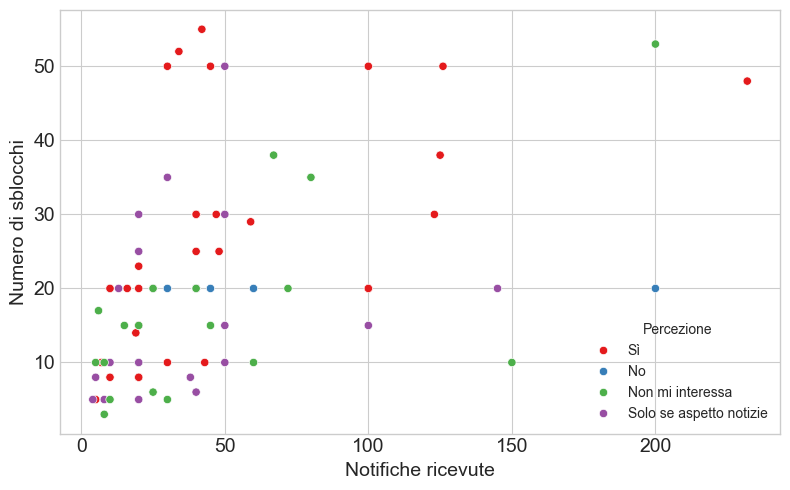

In [5]:
# 7. Scatterplot: Notifiche vs Sblocchi giornalieri per percezione problema
plt.figure(figsize=(8,5))
sns.scatterplot(
    data=df_filtered,
    x='Notifications',
    y='Unlocks',
    hue='Notification_Perception',
    palette='Set1',
    alpha=1
)
plt.xlabel('Notifiche ricevute', fontsize=14)
plt.ylabel('Numero di sblocchi', fontsize=14)
plt.legend(title='Percezione')
plt.xticks(fontsize=14)  # Ingrandisce i valori dell'asse x
plt.yticks(fontsize=14)  # Ingrandisce i valori dell'asse y
plt.tight_layout()
plt.show()

<h2>App più usata in media</h2>
<p>Le app che risultano aver per molti un maggior utilizzo sono WhatsApp e Instagram, mentre le minori sono quelle di Intrattenimento e musica.</p>

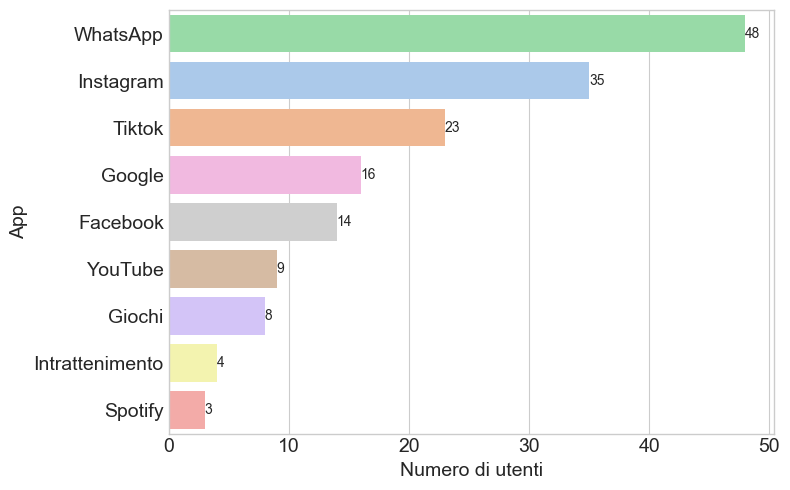

In [6]:
plt.figure(figsize=(8, 5))
g = sns.countplot(data=ds_pers, y='app', order=ds_pers['app'].value_counts().index, hue=ds_pers['app'], legend=False, palette='pastel')
for i in g.containers:
    g.bar_label(i)
plt.xlabel('Numero di utenti', fontsize=14)
plt.ylabel('App', fontsize=14)
plt.xticks(fontsize=14)  # Ingrandisce i valori dell'asse x
plt.yticks(fontsize=14)  # Ingrandisce i valori dell'asse y
plt.tight_layout()
plt.show()

<h2>Tempo medio giornaliero sull’app più usata</h2>
<p>Il maggior tempo medio di utilizzi lo ha Tiktok, rendendola l'app più utilizzata.</p>

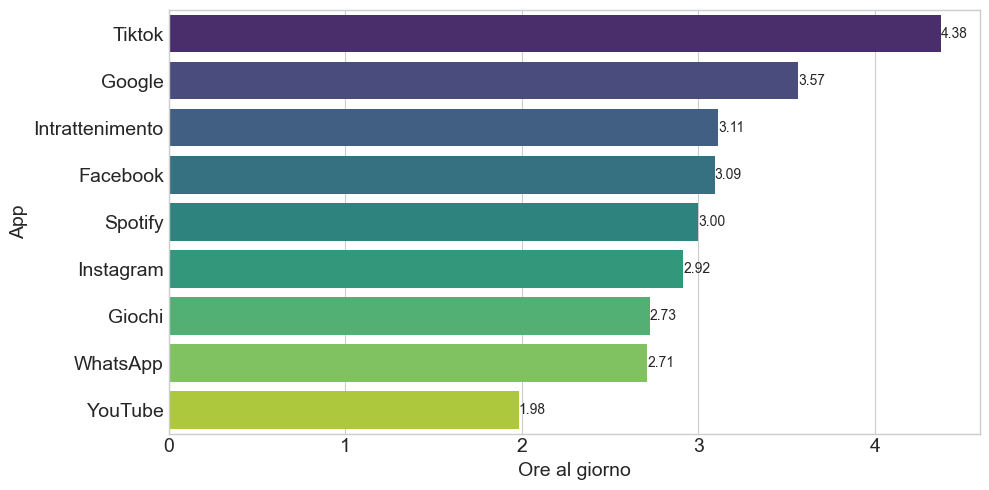

In [7]:
# Sostituisci virgole con punti e converti in float
ds_pers['time_app_clean'] = (
    ds_pers['time_app']
    .astype(str)
    .str.replace(',', '.', regex=False)
    .str.extract(r'(\d+\.?\d*)')[0]  # estrae solo il numero valido
    .astype(float)
)

df_tempo_medio = ds_pers.groupby('app')['time_app_clean'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 5))
f = sns.barplot(x=df_tempo_medio.values, y=df_tempo_medio.index, hue=df_tempo_medio.index, palette='viridis', legend=False)
for i in f.containers:
    f.bar_label(i, fmt='%.2f')
plt.xlabel('Ore al giorno', fontsize=14)
plt.ylabel('App', fontsize=14)
plt.xticks(fontsize=14)  # Ingrandisce i valori dell'asse x
plt.yticks(fontsize=14)  # Ingrandisce i valori dell'asse y
plt.tight_layout()
plt.show()

<h2>Relazione Ansia e Ore sui social</h2>
<p>
    L'Heatmap contiene in ogni cella il numero di persone corrispondente alle sue coordinate.<br>
    Considerando il maggiore in ogni colonna si nota un picco alle 2 ore con livello di ansia a 9.
</p>

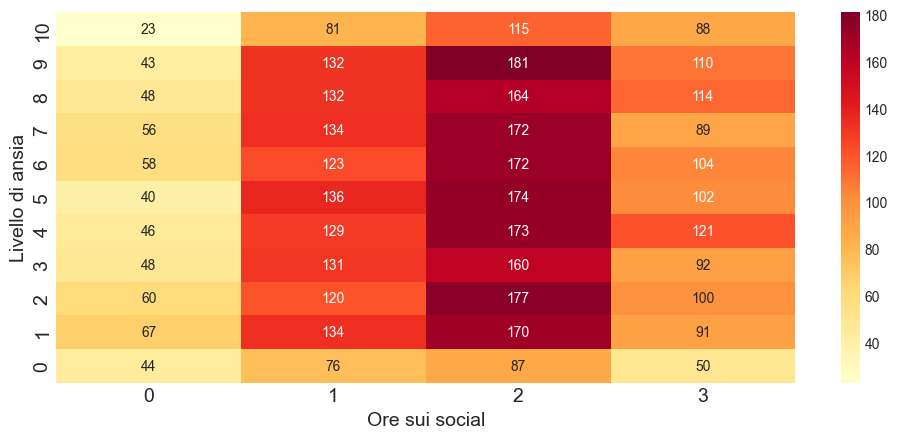

In [8]:
# Raggruppamento per ore intere (arrotonda) e ansia
df_heat = ds_teen[['Time_on_Social_Media', 'Anxiety_Level']].copy()
d = ds_mental_h[['social_media_hours', 'weekly_anxiety_score']].copy()

df_heat['social_media_hours'] = df_heat['Time_on_Social_Media'].astype(int)
d['social_media_hours'] = d['social_media_hours'].astype(int)
d['Anxiety_Level'] = d['weekly_anxiety_score'] % 10

# Unione dei due DataFrame
p = pd.concat([df_heat, d], ignore_index=True)

# Filtro: solo ore sui social ≤ 3
p = p[p['social_media_hours'] <= 3]

# Crea la tabella pivot
pivot_table = p.pivot_table(index='Anxiety_Level', columns='social_media_hours', aggfunc='size', fill_value=0)

# 🔄 Riordina Anxiety_Level da 10 a 1
pivot_table = pivot_table.reindex(index=sorted(pivot_table.index, reverse=True))

# Visualizzazione heatmap
plt.figure(figsize=(10, 4.5))
sns.heatmap(pivot_table, cmap='YlOrRd', annot=True, fmt='d')
plt.xlabel('Ore sui social', fontsize=14)
plt.ylabel('Livello di ansia', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.tight_layout()
plt.show()

<h2>Relazione tra uso social e autostima</h2>
<p>Per i ragazzi, le ore passate sui social influenzano, di poco, l'autostima. 
<br> Al contrario le ragazze non vengono influenzate.</p>

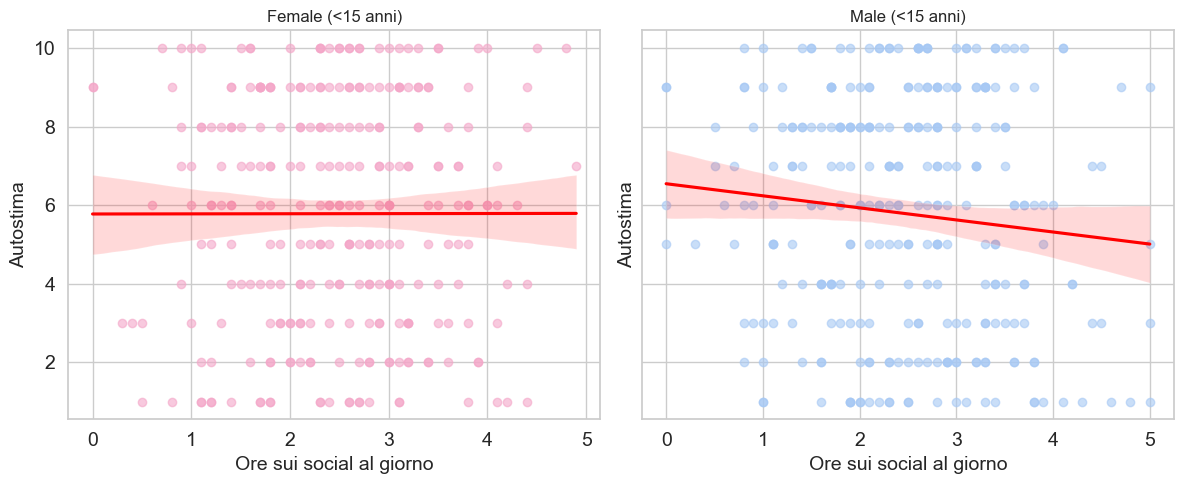

In [9]:
# Imposta lo stile
sns.set(style="whitegrid")

# Prepara i dati
df_social = ds_teen[['Age', 'Gender', 'Time_on_Social_Media', 'Self_Esteem']].copy()
df_social = df_social.rename(columns={'Time_on_Social_Media': 'Social_Hours'})

# Filtra: solo utenti sotto i 15 anni con dati completi
df_social = df_social.dropna(subset=['Social_Hours', 'Self_Esteem', 'Gender', 'Age'])
df_social = df_social[df_social['Age'] < 15]

# Considera solo i generi più comuni
df_social = df_social[df_social['Gender'].isin(['Male', 'Female'])]

# Colori personalizzati
color_map = {
    'Female': '#f4a6c8',  # rosa pastello
    'Male': '#a6c8f4'     # azzurro pastello
}

# Generi presenti nel sottoinsieme
genders = df_social['Gender'].unique()
fig, axes = plt.subplots(1, len(genders), figsize=(12, 5), sharey=True)

# Plot per ciascun genere
for i, gender in enumerate(genders):
    subset = df_social[df_social['Gender'] == gender]
    sns.regplot(
        data=subset,
        x='Social_Hours',
        y='Self_Esteem',
        scatter_kws={'alpha': 0.6, 'color': color_map[gender]},
        line_kws={'color': 'red'},
        ax=axes[i]
    )
    axes[i].set_title(f'{gender} (<15 anni)')
    axes[i].set_xlabel('Ore sui social al giorno', fontsize=14)
    axes[i].set_ylabel('Autostima', fontsize=14)
    # Ingrandisce i valori sugli assi
    axes[i].tick_params(axis='both', labelsize=14)
    
plt.tight_layout()
plt.show()

<h2>Ore di schermo vs Sonno</h2>
Notiamo stabilità all'inizio, mentre alla fine inizia ad avere dei valori distanti tra loro. <br>
Nel secondo si nota un leggero calo, con dei picchi maggiori all'inizio e alla fine.
</p>

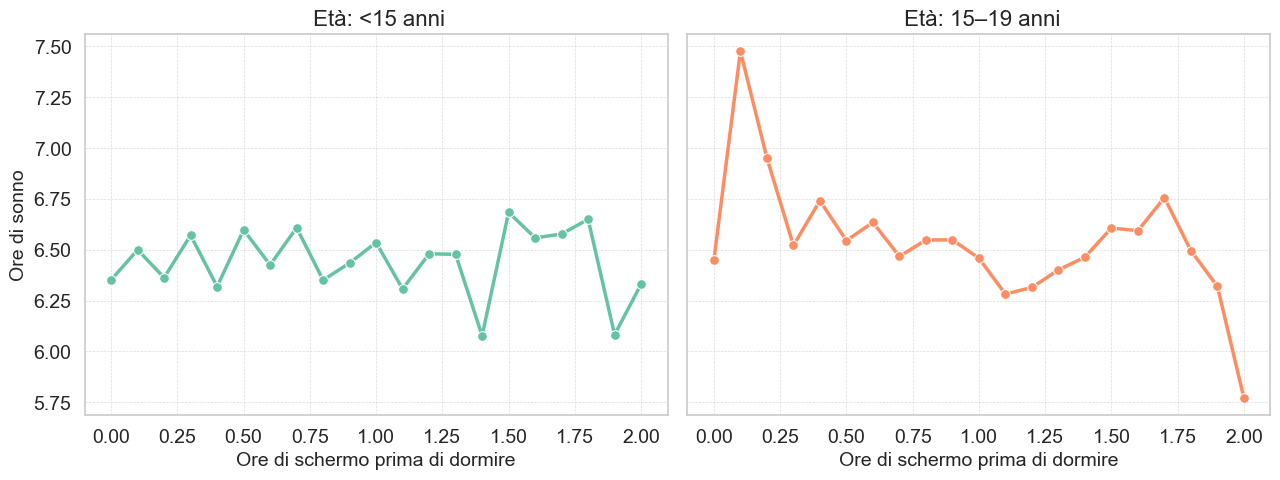

In [10]:
# Prepara i dati per il grafico
df_sleep = ds_teen[['Age', 'Screen_Time_Before_Bed', 'Sleep_Hours']].copy()
df_sleep = df_sleep.rename(columns={'Screen_Time_Before_Bed': 'Night_Screen'})

# Crea le fasce d’età
df_sleep['Age_Group'] = pd.cut(
    df_sleep['Age'],
    bins=[0, 16, 19],
    labels=['<15 anni', '15–19 anni'],
    right=False
)

# Rimuove righe con valori mancanti o non valide
df_sleep = df_sleep.dropna(subset=['Night_Screen', 'Sleep_Hours', 'Age_Group'])

# 🔍 Applica filtro: massimo 2 ore di schermo prima di dormire
df_sleep = df_sleep[df_sleep['Night_Screen'] <= 2]

# Imposta lo stile
sns.set(style="whitegrid", font_scale=1.1)

# Definizione colori personalizzati per le due fasce d’età
palette = {
    '<15 anni': '#66c2a5',      # verde acqua
    '15–19 anni': '#fc8d62'     # arancio chiaro
}

# Plot separati per fascia d’età
fig, axes = plt.subplots(1, 2, figsize=(13, 5), sharey=True)
age_groups = df_sleep['Age_Group'].cat.categories

for i, group in enumerate(age_groups):
    subset = df_sleep[df_sleep['Age_Group'] == group]
    # Calcola media ore di sonno per ciascuna quantità di schermo (fino a 2 ore)
    agg = subset.groupby('Night_Screen')['Sleep_Hours'].mean().reset_index()

    sns.lineplot(
        data=agg,
        x='Night_Screen',
        y='Sleep_Hours',
        ax=axes[i],
        color=palette[group],
        marker='o',
        linewidth=2.5,
        markersize=7
    )

    axes[i].set_title(f' Età: {group}', fontsize=16)
    axes[i].set_xlabel('Ore di schermo prima di dormire', fontsize=14)
    axes[i].set_ylabel('Ore di sonno', fontsize=14)
    axes[i].tick_params(axis='both', labelsize=14)
    axes[i].grid(True, linestyle='--', linewidth=0.5, alpha=0.7)

# Imposta margini e layout
plt.tight_layout()
plt.show()

<h1>Conclusioni</h1>
<p>
    L’analisi evidenzia che:
    <ul>
        <li>I più giovani (sotto i 15 anni) sono coloro che trascorrono più tempo allo schermo.</li>
        <li>WhatsApp e Instagram, le app più usate.</li>
        <li>Riguardo il tempo trasacorso su esse Tiktok è quella più usata.</li>
        <li>Il legame tra social e ansia non emerge chiaramente.</li>
        <li>Nei ragazzi i social sembrano avere una leggera influenza sull'autostima.</li>
    </ul>
</p>

In [11]:
!python -m nbconvert phone_usage.ipynb  --to slides --SlidesExporter.reveal_number='c/t' --no-input

[NbConvertApp] Converting notebook phone_usage.ipynb to slides
[NbConvertApp] WARNING | Alternative text is missing on 8 image(s).
[NbConvertApp] Writing 699386 bytes to phone_usage.slides.html
